In [3]:
import pyodbc
import sqlalchemy as sa
import pandas as pd
from urllib.parse import quote

# Configurando a conexão com o SQL Server
server = 'ultraflowdbserver.database.windows.net'
database = 'ultraflowdb'
username = 'usuario_ultraflow'
password = '@database.password123!'
driver = '{ODBC Driver 17 for SQL Server}'

# Criando a string de conexão com o tempo limite aumentado
connection_string = f'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password};Timeout=30'

# Conectando ao banco de dados
try:
    conn = pyodbc.connect(connection_string)
    print("Conexão bem-sucedida!")

    # Criando um cursor e listando tabelas
    cursor = conn.cursor()
    cursor.execute("SELECT table_name FROM information_schema.tables WHERE table_type = 'BASE TABLE' AND table_catalog = ?", (database,))

    # Listando todas as tabelas no banco de dados
    tables = cursor.fetchall()
    print("Tabelas no banco de dados:")
    for table in tables:
        print(table.table_name)

    # Fechando a conexão
    conn.close()

except pyodbc.Error as ex:
    print("Erro ao conectar ao banco de dados:")
    print(ex)

Conexão bem-sucedida!
Tabelas no banco de dados:
teste
dRegionaisDEPARA
Address
dFornecedores
dObras
dContasContabeis
SalesOrderHeader
SalesOrderDetail
ProductModelProductDescription
ProductDescription
dProdutos
dCompradores
Customer
fPedidosCompras
dCondPagamento
CustomerAddress
ProductCategory
dCentroCusto
dArmazens
ProductModel
Product


## Data Acquisition 

In [1]:
import pandas as pd
import requests

# Define a URL do arquivo JSON
url = "https://datalakedigitalhouse.blob.core.windows.net/digital-house/5%20JSON%20-%20ProductCategory.json"

# Faz a requisição para obter os dados
response = requests.get(url)

# Verifica se a requisição foi bem-sucedida
if response.status_code == 200:
    # Converte os dados para formato JSON
    data = response.json()
    
    # Carrega os dados JSON em um DataFrame do Pandas
    df = pd.DataFrame(data)
    
    # Exibe as primeiras linhas do DataFrame para verificação
    print(df.head())
else:
    print(f"Erro ao acessar a URL: {response.status_code}")


   ProductCategoryID  ParentProductCategoryID            Name  \
0                  1                      NaN           Bikes   
1                  2                      NaN      Components   
2                  3                      NaN        Clothing   
3                  4                      NaN     Accessories   
4                  5                      1.0  Mountain Bikes   

                                rowguid             ModifiedDate  
0  CFBDA25C-DF71-47A7-B81B-64EE161AA37C  2002-06-01 00:00:00.000  
1  C657828D-D808-4ABA-91A3-AF2CE02300E9  2002-06-01 00:00:00.000  
2  10A7C342-CA82-48D4-8A38-46A2EB089B74  2002-06-01 00:00:00.000  
3  2BE3BE36-D9A2-4EEE-B593-ED895D97C2A6  2002-06-01 00:00:00.000  
4  2D364ADE-264A-433C-B092-4FCBF3804E01  2002-06-01 00:00:00.000  


### Leitura dos Arquivos

In [3]:
import pandas as pd

# Leitura dos arquivos CSV
ecommerce_data = pd.read_csv("C:/Users/karin/OneDrive/Área de Trabalho/data science/Aula 22 - Data Acquisition I-20240903T223726Z-001/Aula 22 - Data Acquisition I/Ecommerce Purchases.csv")

In [4]:
import pandas as pd
import gzip

# Tentar abrir o arquivo como um arquivo comprimido com gzip
try:
    with gzip.open("C:/Users/karin/OneDrive/Área de Trabalho/data science/Aula 22 - Data Acquisition I-20240903T223726Z-001/Aula 22 - Data Acquisition I/data.pkl", 'rb') as f:
        pkl_data = pd.read_pickle(f)
    print(pkl_data.head())
except Exception as e:
    print(f"Erro: {e}")
    
# Leitura dos arquivos Excel e Pickle
excel_data = pd.read_excel("C:/Users/karin/OneDrive/Área de Trabalho/data science/Aula 22 - Data Acquisition I-20240903T223726Z-001/Aula 22 - Data Acquisition I/data.xlsx")




    Age      Sex      ID    Race         Country   Education  Education-Num  \
0  39.0     Male   49084   White   United-States   Bachelors           13.0   
1  50.0     Male   68553   White   United-States   Bachelors           13.0   
2  38.0     Male  143654   White   United-States     HS-grad            9.0   
3  53.0     Male   41510   Black   United-States        11th            7.0   
4  28.0   Female  195025   Black            Cuba   Bachelors           13.0   

        Marital Status    Relationship  
0        Never-married   Not-in-family  
1   Married-civ-spouse         Husband  
2             Divorced   Not-in-family  
3   Married-civ-spouse         Husband  
4   Married-civ-spouse            Wife  


In [5]:
import pandas as pd

# Leitura dos arquivos de texto
dates1 = pd.read_csv("C:/Users/karin/OneDrive/Área de Trabalho/data science/Aula 22 - Data Acquisition I-20240903T223726Z-001/Aula 22 - Data Acquisition I/dates.txt", header=None)
dates2 = pd.read_csv("C:/Users/karin/OneDrive/Área de Trabalho/data science/Aula 22 - Data Acquisition I-20240903T223726Z-001/Aula 22 - Data Acquisition I/dates2.txt", header=None)
dates3 = pd.read_csv("C:/Users/karin/OneDrive/Área de Trabalho/data science/Aula 22 - Data Acquisition I-20240903T223726Z-001/Aula 22 - Data Acquisition I/dates3.txt", header=None)

In [7]:
import pandas as pd

# Leitura do arquivo "enquete.txt" com delimitadores personalizados
enquete_data = pd.read_csv(r'C:/Users/karin/OneDrive/Área de Trabalho/data science/Aula 22 - Data Acquisition I-20240903T223726Z-001/Aula 22 - Data Acquisition I/enquete.txt', sep=r'\s+', engine='python')


In [8]:
# Leitura do arquivo "ex_boleano.txt"
ex_boleano_data = pd.read_csv("C:/Users/karin/OneDrive/Área de Trabalho/data science/Aula 22 - Data Acquisition I-20240903T223726Z-001/Aula 22 - Data Acquisition I/ex_boleano.txt", header=None)

# Leitura do arquivo "white_space.txt" com a correção sugerida
white_space_data = pd.read_csv("C:/Users/karin/OneDrive/Área de Trabalho/data science/Aula 22 - Data Acquisition I-20240903T223726Z-001/Aula 22 - Data Acquisition I/white_space.txt", header=None, sep=r'\s+')

In [9]:
# Vamos verificar a estrutura dos dados e se há valores faltantes
print(ecommerce_data.info())
print(excel_data.info())
print(pkl_data.info())
print(enquete_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48843 entries, 0 to 48

In [10]:
# Transformação: Exemplo de limpeza dos dados da enquete, preenchendo valores NaN
enquete_data.fillna(0, inplace=True)

# Convertendo tipos de dados se necessário
enquete_data['asistio'] = enquete_data['asistio'].astype(int)
enquete_data['Tarea'] = enquete_data['Tarea'].astype(float)
enquete_data['Comportamiento'] = enquete_data['Comportamiento'].astype(float)

### Análise e Visualização

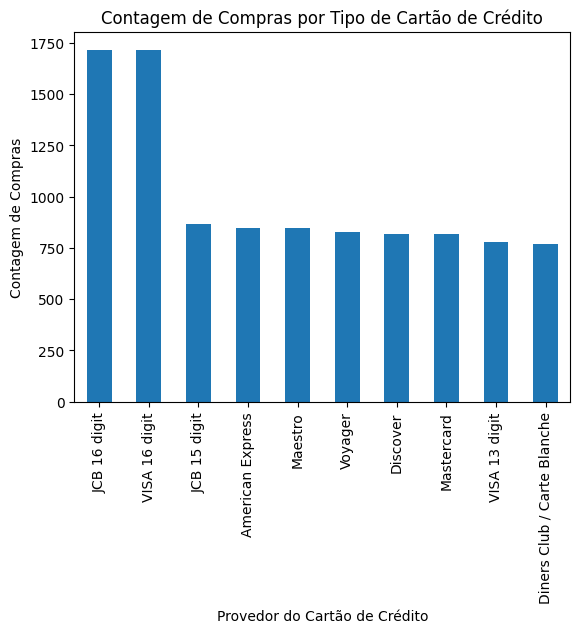

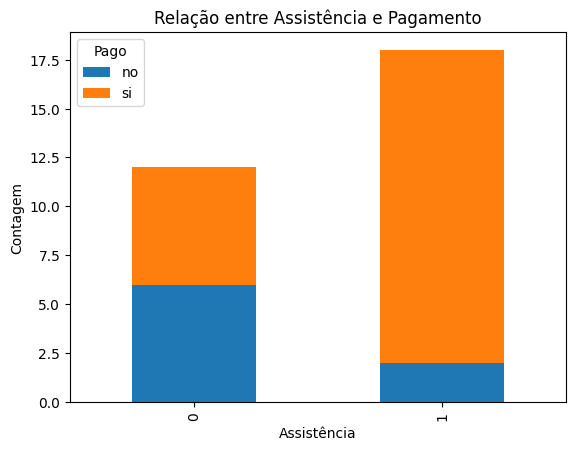

In [11]:
import matplotlib.pyplot as plt

# Exemplo: Contagem de compras por tipo de cartão no dataset de Ecommerce
ecommerce_data['CC Provider'].value_counts().plot(kind='bar')
plt.title('Contagem de Compras por Tipo de Cartão de Crédito')
plt.xlabel('Provedor do Cartão de Crédito')
plt.ylabel('Contagem de Compras')
plt.show()

# Exemplo: Relação entre "asistio" e "Pago" no dataset da enquete
enquete_data.groupby(['asistio', 'Pago']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Relação entre Assistência e Pagamento')
plt.xlabel('Assistência')
plt.ylabel('Contagem')
plt.show()


#### Armazenamento dos Resultados

In [12]:
import sqlite3
import pandas as pd

# Supondo que os dados já foram carregados e processados anteriormente

# Salvando os dados transformados em novos arquivos CSV
ecommerce_data.to_csv('ecommerce_data_cleaned.csv', index=False)
enquete_data.to_csv('enquete_data_cleaned.csv', index=False)

# Ou você pode armazenar em um banco de dados SQL
conn = sqlite3.connect('meu_banco_de_dados.db')
ecommerce_data.to_sql('ecommerce', conn, if_exists='replace', index=False)
enquete_data.to_sql('enquete', conn, if_exists='replace', index=False)

# Fechar a conexão com o banco de dados
conn.close()



## Criação de APIs para Fornecer Acesso aos Dados Processados
Objetivo: Criar uma API RESTful que permita a outros sistemas ou usuários acessar os dados processados.

Usando Flask para Criar uma API Simples:

In [16]:
from flask import Flask, jsonify
import sqlite3

app = Flask(__name__)

def query_db(query):
    conn = sqlite3.connect('meu_banco_de_dados.db')
    cursor = conn.cursor()
    cursor.execute(query)
    result = cursor.fetchall()
    conn.close()
    return result

@app.route('/api/ecommerce', methods=['GET'])
def get_ecommerce_data():
    data = query_db("SELECT * FROM ecommerce")
    return jsonify(data)

@app.route('/api/enquete', methods=['GET'])
def get_enquete_data():
    data = query_db("SELECT * FROM enquete")
    return jsonify(data)

if __name__ == '__main__':
    app.run(debug=True, use_reloader=False)  # Certifique-se de estar executando com use_reloader=False no Jupyter Notebook




 * Serving Flask app '__main__'
 * Debug mode: on


00:31:31.820 | INFO    | werkzeug - WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000

00:31:31.829 | INFO    | werkzeug - Press CTRL+C to quit

00:31:36.647 | INFO    | werkzeug - 127.0.0.1 - - [04/Sep/2024 00:31:36] "GET /api/ecommerce HTTP/1.1" 200 -

00:31:37.545 | INFO    | werkzeug - 127.0.0.1 - - [04/Sep/2024 00:31:37] "GET /api/ecommerce HTTP/1.1" 200 -

00:31:51.247 | INFO    | werkzeug - 127.0.0.1 - - [04/Sep/2024 00:31:51] "GET /api/enquete HTTP/1.1" 200 -

## Automatização do Pipeline de Dados com o Prefect
Objetivo: Automatizar o pipeline de ETL, desde a ingestão de dados até a análise e armazenamento.


In [31]:
import pandas as pd
import sqlite3
from prefect import task, flow

# Definindo tarefas para o pipeline
@task
def extract_data():
    # Use o caminho absoluto para o arquivo CSV
    data = pd.read_csv('C:/Users/karin/OneDrive/Área de Trabalho/data science/ecommerce_data_cleaned.csv')
    print(data.columns)  # Verificar as colunas disponíveis
    return data

@task
def transform_data(data):
    # Supondo que você queira usar a coluna 'Purchase Price' para algum cálculo
    # Exemplo: Total_Price como duplicata de Purchase Price (ou ajuste conforme necessário)
    data['Total_Price'] = data['Purchase Price']  # Ajuste conforme sua lógica
    return data

@task
def load_data(data):
    conn = sqlite3.connect('meu_banco_de_dados.db')
    data.to_sql('ecommerce', conn, if_exists='replace', index=False)
    conn.close()

# Definindo o fluxo (pipeline) de ETL usando a API moderna
@flow(name="ETL Pipeline")
def etl_flow():
    data = extract_data()
    transformed_data = transform_data(data)
    load_data(transformed_data)

# Executando o fluxo
etl_flow()


00:49:06.171 | INFO    | prefect.engine - Created flow run 'transparent-barracuda' for flow 'ETL Pipeline'

00:49:06.475 | INFO    | Flow run 'transparent-barracuda' - Created task run 'extract_data-0' for task 'extract_data'

00:49:06.481 | INFO    | Flow run 'transparent-barracuda' - Executing 'extract_data-0' immediately...

Index(['Address', 'Lot', 'AM or PM', 'Browser Info', 'Company', 'Credit Card',
       'CC Exp Date', 'CC Security Code', 'CC Provider', 'Email', 'Job',
       'IP Address', 'Language', 'Purchase Price'],
      dtype='object')


00:49:06.829 | INFO    | Task run 'extract_data-0' - Finished in state Completed()

00:49:06.917 | INFO    | Flow run 'transparent-barracuda' - Created task run 'transform_data-0' for task 'transform_data'

00:49:06.920 | INFO    | Flow run 'transparent-barracuda' - Executing 'transform_data-0' immediately...

00:49:07.099 | INFO    | Task run 'transform_data-0' - Finished in state Completed()

00:49:07.141 | INFO    | Flow run 'transparent-barracuda' - Created task run 'load_data-0' for task 'load_data'

00:49:07.141 | INFO    | Flow run 'transparent-barracuda' - Executing 'load_data-0' immediately...

00:49:07.614 | INFO    | Task run 'load_data-0' - Finished in state Completed()

00:49:07.727 | INFO    | Flow run 'transparent-barracuda' - Finished in state Completed('All states completed.')

[Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `DataFrame`')),
 Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `DataFrame`')),
 Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `NoneType`'))]

In [32]:
result = etl_flow()
print(result)


00:50:01.667 | INFO    | prefect.engine - Created flow run 'tangible-iguana' for flow 'ETL Pipeline'

00:50:01.795 | INFO    | Flow run 'tangible-iguana' - Created task run 'extract_data-0' for task 'extract_data'

00:50:01.795 | INFO    | Flow run 'tangible-iguana' - Executing 'extract_data-0' immediately...

Index(['Address', 'Lot', 'AM or PM', 'Browser Info', 'Company', 'Credit Card',
       'CC Exp Date', 'CC Security Code', 'CC Provider', 'Email', 'Job',
       'IP Address', 'Language', 'Purchase Price'],
      dtype='object')


00:50:01.981 | INFO    | Task run 'extract_data-0' - Finished in state Completed()

00:50:02.038 | INFO    | Flow run 'tangible-iguana' - Created task run 'transform_data-0' for task 'transform_data'

00:50:02.040 | INFO    | Flow run 'tangible-iguana' - Executing 'transform_data-0' immediately...

00:50:02.180 | INFO    | Task run 'transform_data-0' - Finished in state Completed()

00:50:02.210 | INFO    | Flow run 'tangible-iguana' - Created task run 'load_data-0' for task 'load_data'

00:50:02.210 | INFO    | Flow run 'tangible-iguana' - Executing 'load_data-0' immediately...

00:50:02.527 | INFO    | Task run 'load_data-0' - Finished in state Completed()

00:50:02.581 | INFO    | Flow run 'tangible-iguana' - Finished in state Completed('All states completed.')

[Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `DataFrame`')), Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `DataFrame`')), Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `NoneType`'))]


In [34]:
@task
def transform_data(data):
    # Supondo que exista outra coluna chamada 'Quantity' ou similar
    # Ajuste a lógica para a multiplicação adequada
    data['Total_Price'] = data['Purchase Price'] * outra_coluna
    return data


In [35]:
import pandas as pd
import sqlite3
from prefect import task, flow

# Definindo tarefas para o pipeline
@task
def extract_data():
    # Use o caminho absoluto para o arquivo CSV
    data = pd.read_csv('C:/Users/karin/OneDrive/Área de Trabalho/data science/ecommerce_data_cleaned.csv')
    print(data.columns)  # Verificar as colunas disponíveis
    return data

@task
def transform_data(data):
    # Supondo que você queira usar a coluna 'Purchase Price' para algum cálculo
    data['Total_Price'] = data['Purchase Price']  # Ajuste conforme sua lógica
    print(data.head())  # Exibir os primeiros dados com a nova coluna
    return data

@task
def load_data(data):
    conn = sqlite3.connect('meu_banco_de_dados.db')
    data.to_sql('ecommerce', conn, if_exists='replace', index=False)
    conn.close()

# Definindo o fluxo (pipeline) de ETL usando a API moderna
@flow(name="ETL Pipeline")
def etl_flow():
    data = extract_data()
    transformed_data = transform_data(data)
    load_data(transformed_data)
    return transformed_data  # Retornar o DataFrame final

# Executando o fluxo
result = etl_flow()

# Exibir os dados transformados
print(result.head())


00:51:34.855 | INFO    | prefect.engine - Created flow run 'denim-galago' for flow 'ETL Pipeline'

00:51:35.074 | INFO    | Flow run 'denim-galago' - Created task run 'extract_data-0' for task 'extract_data'

00:51:35.084 | INFO    | Flow run 'denim-galago' - Executing 'extract_data-0' immediately...

Index(['Address', 'Lot', 'AM or PM', 'Browser Info', 'Company', 'Credit Card',
       'CC Exp Date', 'CC Security Code', 'CC Provider', 'Email', 'Job',
       'IP Address', 'Language', 'Purchase Price'],
      dtype='object')


00:51:35.442 | INFO    | Task run 'extract_data-0' - Finished in state Completed()

00:51:35.519 | INFO    | Flow run 'denim-galago' - Created task run 'transform_data-0' for task 'transform_data'

00:51:35.523 | INFO    | Flow run 'denim-galago' - Executing 'transform_data-0' immediately...

                                             Address    Lot AM or PM  \
0  16629 Pace Camp Apt. 448\nAlexisborough, NE 77...  46 in       PM   
1  9374 Jasmine Spurs Suite 508\nSouth John, TN 8...  28 rn       PM   
2                   Unit 0065 Box 5052\nDPO AP 27450  94 vE       PM   
3              7780 Julia Fords\nNew Stacy, WA 45798  36 vm       PM   
4  23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...  20 IE       AM   

                                        Browser Info  \
0  Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...   
1  Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...   
2  Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...   
3  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...   
4  Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...   

                           Company       Credit Card CC Exp Date  \
0                  Martinez-Herman  6011929061123406       02/20   
1  Fletcher, Richards and Whitaker  3337758169645356       11/18   
2       Simpson, Williams 

00:51:35.811 | INFO    | Task run 'transform_data-0' - Finished in state Completed()

00:51:35.877 | INFO    | Flow run 'denim-galago' - Created task run 'load_data-0' for task 'load_data'

00:51:35.892 | INFO    | Flow run 'denim-galago' - Executing 'load_data-0' immediately...

00:51:36.428 | INFO    | Task run 'load_data-0' - Finished in state Completed()

00:51:36.515 | INFO    | Flow run 'denim-galago' - Finished in state Completed()

                                             Address    Lot AM or PM  \
0  16629 Pace Camp Apt. 448\nAlexisborough, NE 77...  46 in       PM   
1  9374 Jasmine Spurs Suite 508\nSouth John, TN 8...  28 rn       PM   
2                   Unit 0065 Box 5052\nDPO AP 27450  94 vE       PM   
3              7780 Julia Fords\nNew Stacy, WA 45798  36 vm       PM   
4  23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...  20 IE       AM   

                                        Browser Info  \
0  Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...   
1  Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...   
2  Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...   
3  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...   
4  Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...   

                           Company       Credit Card CC Exp Date  \
0                  Martinez-Herman  6011929061123406       02/20   
1  Fletcher, Richards and Whitaker  3337758169645356       11/18   
2       Simpson, Williams 

## Pipeline com Machine Learning

### Machine Learning (Regressão Linear)

In [42]:
import pandas as pd
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import joblib  # Para salvar o modelo
from prefect import task, flow

# Definindo tarefas para o pipeline
@task
def extract_data():
    data = pd.read_csv('C:/Users/karin/OneDrive/Área de Trabalho/data science/ecommerce_data_cleaned.csv')
    print("Dados extraídos:")
    print(data.head())  # Exibir os primeiros dados
    return data

@task
def transform_data(data):
    data['Total_Price'] = data['Purchase Price']
    print("Dados após a transformação:")
    print(data.head())  # Exibir os dados após a transformação
    return data

@task
def prepare_for_modeling(data):
    le = LabelEncoder()
    data['Job_encoded'] = le.fit_transform(data['Job'])
    data['Company_encoded'] = le.fit_transform(data['Company'])
    data['Language_encoded'] = le.fit_transform(data['Language'])

    X = data[['Job_encoded', 'Company_encoded', 'Language_encoded']]
    y = data['Purchase Price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Dados preparados para modelagem:")
    print(X_train.head())  # Exibir os primeiros dados de treino
    return X_train, X_test, y_train, y_test

@task
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    joblib.dump(model, 'linear_regression_model.pkl')
    print("Modelo treinado.")
    return model

@task
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    print(f"Acurácia do modelo: {accuracy}")
    return accuracy

@task
def load_data(data):
    conn = sqlite3.connect('meu_banco_de_dados.db')
    data.to_sql('ecommerce', conn, if_exists='replace', index=False)
    conn.close()
    print("Dados carregados no banco de dados.")

# Definindo o fluxo (pipeline) de ETL e Machine Learning usando a API moderna
@flow(name="ETL + Machine Learning Pipeline")
def etl_ml_flow():
    data = extract_data()
    transformed_data = transform_data(data)
    X_train, X_test, y_train, y_test = prepare_for_modeling(transformed_data)
    model = train_model(X_train, y_train)
    accuracy = evaluate_model(model, X_test, y_test)
    load_data(transformed_data)

# Executando o fluxo
etl_ml_flow()



00:58:44.670 | INFO    | prefect.engine - Created flow run 'watchful-fox' for flow 'ETL + Machine Learning Pipeline'

00:58:44.957 | INFO    | Flow run 'watchful-fox' - Created task run 'extract_data-0' for task 'extract_data'

00:58:44.957 | INFO    | Flow run 'watchful-fox' - Executing 'extract_data-0' immediately...

Dados extraídos:
                                             Address    Lot AM or PM  \
0  16629 Pace Camp Apt. 448\nAlexisborough, NE 77...  46 in       PM   
1  9374 Jasmine Spurs Suite 508\nSouth John, TN 8...  28 rn       PM   
2                   Unit 0065 Box 5052\nDPO AP 27450  94 vE       PM   
3              7780 Julia Fords\nNew Stacy, WA 45798  36 vm       PM   
4  23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...  20 IE       AM   

                                        Browser Info  \
0  Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...   
1  Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...   
2  Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...   
3  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...   
4  Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...   

                           Company       Credit Card CC Exp Date  \
0                  Martinez-Herman  6011929061123406       02/20   
1  Fletcher, Richards and Whitaker  3337758169645356       11/18   
2       S

00:58:45.514 | INFO    | Task run 'extract_data-0' - Finished in state Completed()

00:58:45.585 | INFO    | Flow run 'watchful-fox' - Created task run 'transform_data-0' for task 'transform_data'

00:58:45.587 | INFO    | Flow run 'watchful-fox' - Executing 'transform_data-0' immediately...

Dados após a transformação:
                                             Address    Lot AM or PM  \
0  16629 Pace Camp Apt. 448\nAlexisborough, NE 77...  46 in       PM   
1  9374 Jasmine Spurs Suite 508\nSouth John, TN 8...  28 rn       PM   
2                   Unit 0065 Box 5052\nDPO AP 27450  94 vE       PM   
3              7780 Julia Fords\nNew Stacy, WA 45798  36 vm       PM   
4  23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...  20 IE       AM   

                                        Browser Info  \
0  Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...   
1  Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...   
2  Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...   
3  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...   
4  Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...   

                           Company       Credit Card CC Exp Date  \
0                  Martinez-Herman  6011929061123406       02/20   
1  Fletcher, Richards and Whitaker  3337758169645356       11/18  

00:58:45.772 | INFO    | Task run 'transform_data-0' - Finished in state Completed()

00:58:45.804 | INFO    | Flow run 'watchful-fox' - Created task run 'prepare_for_modeling-0' for task 'prepare_for_modeling'

00:58:45.819 | INFO    | Flow run 'watchful-fox' - Executing 'prepare_for_modeling-0' immediately...

Dados preparados para modelagem:
      Job_encoded  Company_encoded  Language_encoded
9254          138             4558                 0
1561          545             3668                 0
1670          216             7523                 4
6087          338             6067                 1
6669          465              613                 0


00:58:46.136 | INFO    | Task run 'prepare_for_modeling-0' - Finished in state Completed()

00:58:46.208 | INFO    | Flow run 'watchful-fox' - Created task run 'train_model-0' for task 'train_model'

00:58:46.215 | INFO    | Flow run 'watchful-fox' - Executing 'train_model-0' immediately...

Modelo treinado.


00:58:46.645 | INFO    | Task run 'train_model-0' - Finished in state Completed()

00:58:46.698 | INFO    | Flow run 'watchful-fox' - Created task run 'evaluate_model-0' for task 'evaluate_model'

00:58:46.701 | INFO    | Flow run 'watchful-fox' - Executing 'evaluate_model-0' immediately...

Acurácia do modelo: -0.0011237257048015703


00:58:46.908 | INFO    | Task run 'evaluate_model-0' - Finished in state Completed()

00:58:47.104 | INFO    | Flow run 'watchful-fox' - Created task run 'load_data-0' for task 'load_data'

00:58:47.108 | INFO    | Flow run 'watchful-fox' - Executing 'load_data-0' immediately...

Dados carregados no banco de dados.


00:58:50.108 | INFO    | Task run 'load_data-0' - Finished in state Completed()

00:58:50.237 | INFO    | Flow run 'watchful-fox' - Finished in state Completed('All states completed.')

[Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `DataFrame`')),
 Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `DataFrame`')),
 Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `tuple`')),
 Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `LinearRegression`')),
 Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `float`')),
 Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_descrip